### Classification

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8,8]
np.random.seed(42)

**Import Data**

This data is based on Dermatology Data Set (https://archive.ics.uci.edu/ml/datasets/Dermatology)

Number of Instances: 133

Number of Attributes: 12

Attribute Information:
   - Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
      - 1: erythema
      - 2: scaling
      - 3: definite borders
      - 4: itching
      - 5: koebner phenomenon
      - 6: polygonal papules
      - 7: follicular papules
      - 8: oral mucosal involvement
      - 9: knee and elbow involvement
      - 10: scalp involvement
      - 11: family history, (0 or 1)
      - 12: Age (linear)
      
  
    "Class_code"______________"Class"_______________"Number of instances"
  
         1             seboreic dermatitis                 61
       
        -1             no_seboreic dermatitis              72

In [3]:
df=pd.read_csv('data/data.csv') 

In [4]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,family_history,Age,output
0,2,2,0,3,0,0,0,0,1,0,0,55,1
1,2,3,2,0,0,0,0,0,0,0,0,41,1
2,2,2,0,3,0,0,0,0,0,0,0,21,1
3,3,3,1,2,0,0,0,0,0,1,0,22,1
4,2,2,1,3,0,0,0,0,0,0,0,30,1


classes distribution

In [5]:
y=df['output'].replace(-1,0)
y.value_counts()

0    72
1    61
Name: output, dtype: int64

In [6]:
df_new=df.drop('output',axis=1)
df_new.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,family_history,Age
0,2,2,0,3,0,0,0,0,1,0,0,55
1,2,3,2,0,0,0,0,0,0,0,0,41
2,2,2,0,3,0,0,0,0,0,0,0,21
3,3,3,1,2,0,0,0,0,0,1,0,22
4,2,2,1,3,0,0,0,0,0,0,0,30


### Modeling

**Scaling data**

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_new)
df_scaled=pd.DataFrame(scaler.transform(df_new))

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.284842,0.268863,-1.693099,1.109696,-0.727312,-0.991339,-0.087039,-0.9378,3.961021,-0.221699,-0.17609,1.347548
1,-0.284842,1.823595,0.461754,-2.145956,-0.727312,-0.991339,-0.087039,-0.9378,-0.187135,-0.221699,-0.17609,0.240251
2,-0.284842,0.268863,-1.693099,1.109696,-0.727312,-0.991339,-0.087039,-0.9378,-0.187135,-0.221699,-0.17609,-1.341601
3,1.362288,1.823595,-0.615672,0.024479,-0.727312,-0.991339,-0.087039,-0.9378,-0.187135,3.054521,-0.17609,-1.262508
4,-0.284842,0.268863,-0.615672,1.109696,-0.727312,-0.991339,-0.087039,-0.9378,-0.187135,-0.221699,-0.17609,-0.629767


**Apply PCA on scaled data**

In [8]:
from sklearn.decomposition import PCA

df_scaled_pca = PCA(n_components=2).fit_transform(df_scaled)
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=["PC1", "PC2"])

df_scaled_pca.head()

,PC1,PC2
0,-1.651641,0.275365
1,-1.822186,0.047085
2,-1.755028,-0.406459
3,-2.555338,-2.101450
4,-1.262875,-0.324287


**Training**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Function to train with opcion to choice a classifier and return the f1_score
def split_clf(X,y,classificator):
    if classificator=='NB':
        clf = BernoulliNB()
    elif classificator=='MLP':
        clf = MLPClassifier(activation='tanh', learning_rate_init=.001, random_state=0)
    elif classificator=='SVC':   
        clf = LinearSVC(random_state=0, tol=1e-5)
    elif classificator=='FOREST':
        clf = RandomForestClassifier(n_estimators=10,random_state=0)
    elif classificator=='LOGR':
        clf = LogisticRegression(solver='liblinear',random_state=0)
    else:
        return None
    
    X=X.values
    list_metrics=[]
    list_test_size=[]

    for n in np.linspace(0.1,0.9,9):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=0)
        clf.fit(X_train,y_train)    
        pred=clf.predict(X_test)
        list_metrics.append(f1_score(y_test,pred))
    return list_metrics

#Function to plot f1_score for all the classifiers
def plt_hold_out(d,y,txt_title):
    results=['NB','FOREST','LOGR']
    range_=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    lines=[7,5,3]

    for no_clus in range(len(results)):
        line=plt.plot(range_,split_clf(d,y,results[no_clus]),linewidth=lines[no_clus])
    plt.title(txt_title)
    plt.xlabel('Data test %')
    plt.ylabel('F1 score')
    plt.legend(results, loc=4)
    plt.show()

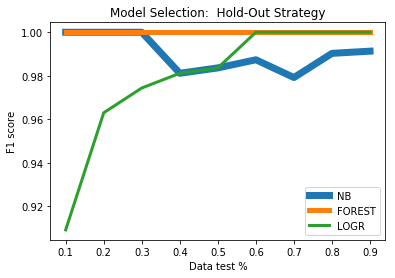

In [10]:
#Plot f1_score for each classifier
d=df_new
plt_hold_out(d,y,'Model Selection:  Hold-Out Strategy')

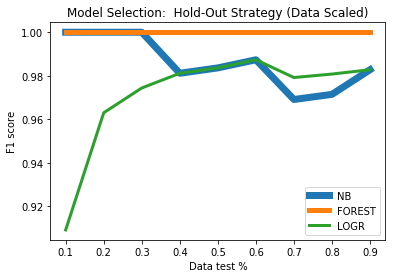

In [11]:
#Plot f1_score for each classifier with scaled data
d=df_scaled
plt_hold_out(d,y,'Model Selection:  Hold-Out Strategy (Data Scaled)')

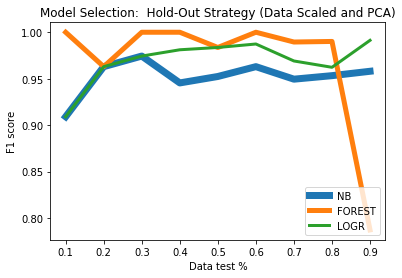

In [12]:
#Plot f1_score for each classifier with scaled data and reduction to dimensionality
d=df_scaled_pca
plt_hold_out(d,y,'Model Selection:  Hold-Out Strategy (Data Scaled and PCA)')

Train a new classifier to calculate his metrics

In [13]:
clf = BernoulliNB()
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.35, random_state=0)
clf.fit(X_train,y_train)    
pred=clf.predict(X_test)
print('f1_score: ', f1_score(y_test,pred))

f1_score:  0.9795918367346939


class distributions

In [14]:
num_positives=y_test.value_counts()[1]
num_negatives=y_test.value_counts()[0]
print('Examples positives: {} and Examples negatives: {}'.format(num_positives,num_negatives))

Examples positives: 24 and Examples negatives: 23


Comparing the true and predicted response values

In [15]:
comp_results=pd.DataFrame(y_test)
comp_results['predictions']=pred
comp_results=comp_results.sort_values(by='output',ascending=False)

Calculating Confusion_Matrix and F1_score

In [16]:
TP=(comp_results.query('output==predictions and output==1')).shape[0]
TN=(comp_results.query('output==predictions and output==0')).shape[0]
FP=(comp_results.query('output!=predictions and output==0')).shape[0]
FN=(comp_results.query('output!=predictions and output==1')).shape[0]
ACC=(TP+TN)/y_test.shape[0]
SEN=TP/num_positives
ESP=TN/num_negatives
PREC=TP/(TP+FP)
F1_SCORE= 2 * (PREC * SEN) / (PREC + SEN)
print('F1 SCORE: ',F1_SCORE) #we calculated the same value than sklearn

F1 SCORE:  0.9795918367346939


In [17]:
CONFUSION_MATRIX=pd.DataFrame([TP,FN], columns=['POSITIVE CLASS'])
CONFUSION_MATRIX['NEGATIVE CLASS']=[FP,TN]
new_index=['Prediction POS','Prediction NEG']
CONFUSION_MATRIX=CONFUSION_MATRIX.set_index([new_index])
print('Confusion Matrix calculated:')
CONFUSION_MATRIX

Confusion Matrix calculated:


,POSITIVE CLASS,NEGATIVE CLASS
Prediction POS,24,1
Prediction NEG,0,22


Plot ROC curve

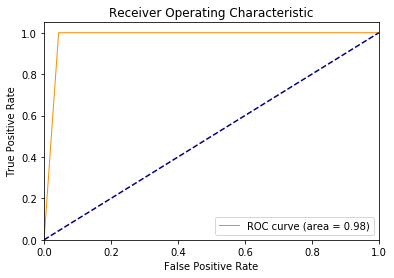

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()